In [3]:
import pandas as pd
import pickle as pk
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [4]:
from tqdm import tqdm

In [40]:
with open(r'../Dataset/dataframe.pkl', 'rb') as f:
    df = pk.load(f)

In [41]:
df["Size"] = df["Simplices"].apply(lambda x : len(x))

In [42]:
y1 = 2000
y2 = 2001
size_max = 21
size_min = 6

In [43]:
l1 = list(df[(df["Time"]==y1) & (df["Size"]<size_max ) & (df["Size"]>=size_min)]["Simplices"])
l2 = list(df[(df["Time"]==y2) & (df["Size"]<size_max ) & (df["Size"]>=size_min)]["Simplices"])
len(l2)

2960

In [44]:
over = np.zeros((len(l1),len(l2)))
inclusion = np.zeros((len(l1),len(l2)))

In [45]:
def overlap_size(a,b):
    return len(a & b)/len(a | b)

In [46]:
def inclusion_size(a,b):
    if b.issubset(a):
        return len(b) - len(a)
    elif a.issubset(b):
        return len(b) - len(a)
    else:
        return np.nan

In [71]:
dict_inc = {}
dict_over = {}

for k,y1 in enumerate(range(1980,1991,2)):
    size_max = 21
    size_min = 5
    print(y1)
    y2 = y1+1
    l1 = list(df[(df["Time"]==y1) & (df["Size"]<size_max ) & (df["Size"]>=size_min)]["Simplices"])
    l2 = list(df[(df["Time"]==y2) & (df["Size"]<size_max ) & (df["Size"]>=size_min)]["Simplices"])
    over = np.zeros((len(l1),len(l2)))
    inclusion = np.zeros((len(l1),len(l2)))

    for i, s1 in tqdm(enumerate(l1), total = len(l1)):
        for j, s2 in enumerate(l2):
            over[i][j] = overlap_size(set(s1),set(s2))
            inclusion[i][j] = inclusion_size(set(s1),set(s2))
    dict_inc[str(y1)] = inclusion
    dict_over[str(y1)] = over

1980


100%|██████████| 607/607 [00:00<00:00, 673.80it/s]


1982


100%|██████████| 628/628 [00:01<00:00, 485.75it/s]


1984


100%|██████████| 798/798 [00:01<00:00, 439.93it/s]


1986


100%|██████████| 925/925 [00:02<00:00, 400.81it/s]


1988


100%|██████████| 1211/1211 [00:04<00:00, 273.04it/s]


1990


100%|██████████| 1501/1501 [00:07<00:00, 203.66it/s]


In [72]:
dict_inc2018 = {}
dict_over2018 = {}

for k,y1 in enumerate(range(2014,2019,2)):
    size_max = 21
    size_min = 5
    print(y1)
    y2 = y1+1
    l1 = list(df[(df["Time"]==y1) & (df["Size"]<size_max ) & (df["Size"]>=size_min)]["Simplices"])
    l2 = list(df[(df["Time"]==y2) & (df["Size"]<size_max ) & (df["Size"]>=size_min)]["Simplices"])
    over = np.zeros((len(l1),len(l2)))
    inclusion = np.zeros((len(l1),len(l2)))

    for i, s1 in tqdm(enumerate(l1), total = len(l1)):
        for j, s2 in enumerate(l2):
            over[i][j] = overlap_size(set(s1),set(s2))
            inclusion[i][j] = inclusion_size(set(s1),set(s2))
    dict_inc2018[str(y1)] = inclusion
    dict_over2018[str(y1)] = over

2014


100%|██████████| 17947/17947 [17:41<00:00, 16.91it/s]


2016


100%|██████████| 20037/20037 [14:03<00:00, 23.76it/s]


2018


0it [00:00, ?it/s]


In [79]:
with open(r"C:\Users\PcLaptop\OneDrive\c72h\dict_inc.pkl", 'wb') as fp:
    pk.dump(dict_inc, fp)

In [80]:
with open(r"C:\Users\PcLaptop\OneDrive\c72h\dict_over.pkl", 'wb') as fp:
    pk.dump(dict_over, fp)

In [56]:
with open(r"C:\Users\PcLaptop\OneDrive\c72h\dict_inc.pkl", 'rb') as f:
    incl = pk.load(f)

In [75]:
incl.update(dict_inc2018)
incl

{'1990': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 '1992': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 '1994': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 '1996': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan,

In [76]:
incl.pop('2018')

array([], shape=(0, 0), dtype=float64)

In [78]:
dict_inc.update(incl)

In [80]:
dict_inc.keys()

dict_keys(['1980', '1982', '1984', '1986', '1988', '1990', '2014', '2016', '2018', '1992', '1994', '1996', '1998', '2000', '2002', '2004', '2006', '2008', '2010', '2012'])

In [87]:
means= np.zeros(len(range(1980,2017,2)))
stds= np.zeros(len(range(1980,2017,2)))
for i, y1 in enumerate(range(1980,2017,2)):    
    df2 = dict_inc[str(y1)].flatten()[~np.isnan(dict_inc[str(y1)].flatten())]
    means[i]= df2.mean()
    stds[i]= df2.std()

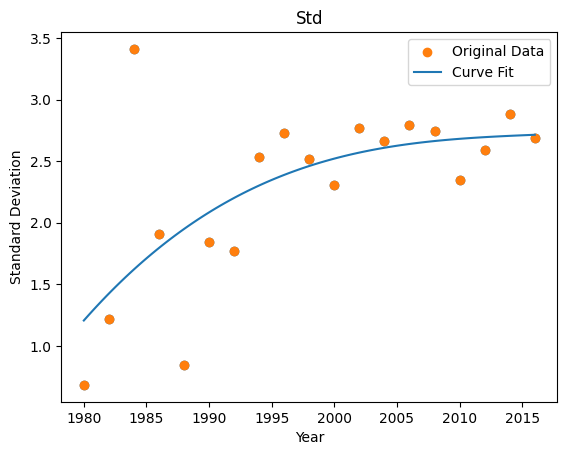

In [114]:
from scipy.interpolate import interp1d
from matplotlib.pyplot import errorbar
new_x = np.linspace(1980, 2016, 100)  # Adjust the number of points as needed

# Interpolate y-values for new_x
new_y = np.interp(new_x, np.array(range(1980,2017,2)), stds)
x=np.array(range(1980,2017,2))
y=stds

plt.scatter(x=x,y=y)

degree = 3  # Adjust the degree of the polynomial as needed
coefficients = np.polyfit(x, y, degree)
curve_fit = np.poly1d(coefficients)

# New x-values for plotting the curve
new_x = np.linspace(1980, 2016, 100)  # Adjust the number of points as needed

# Evaluate the curve fit for new_x
new_y = curve_fit(new_x)

# Plot the original scatter plot
plt.scatter(x, y, label='Original Data')


# Plot the curve fit
plt.plot(new_x, new_y, label='Curve Fit')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Standard Deviation')
plt.title('Std')

# Show legend
plt.legend()

# Display the plot
plt.show()


#errorbar(x=np.array(range(1980,2016,4)),y=means, yerr=stds)

In [113]:
np.diag(cov_matrix)

array([1.67032701e-08, 6.00117166e-01, 2.39560328e+06, 1.06252230e+12])

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Existing data points
x = np.array(range(1980, 2017, 2))
y = stds

# Fit a curve (polynomial) to the data
degree = 3  # Adjust the degree of the polynomial as needed
coefficients, cov_matrix = np.polyfit(x, y, degree, cov=True)
curve_fit = np.poly1d(coefficients)

# New x-values for plotting the curve
new_x = np.linspace(1980, 2016, 100)  # Adjust the number of points as needed

# Evaluate the curve fit for new_x
new_y = curve_fit(new_x)

# Calculate the confidence interval
n = len(x)
p = coefficients.size
t_value = 2.262  # Adjust the t-value for desired confidence level (95%: 2.262)
conf_int = t_value * np.sqrt(np.diag(cov_matrix) * (1/n + (new_x - np.mean(x))**2 / np.sum((x - np.mean(x))**2)))

# Plot the original scatter plot
plt.scatter(x, y, label='Original Data')

# Plot the curve fit
plt.plot(new_x, new_y, label='Curve Fit')

# Plot the upper and lower confidence interval bounds
plt.fill_between(new_x, new_y + conf_int, new_y - conf_int, color='gray', alpha=0.4, label='Confidence Interval')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Standard Deviation')
plt.title('Curve Fitting with Confidence Interval')

# Show legend
plt.legend()

# Display the plot
plt.show()


ValueError: operands could not be broadcast together with shapes (4,) (100,) 

In [36]:
with open(r"C:\Users\PcLaptop\OneDrive\c72h\dict_inc.pkl", 'rb') as fp:
    df=pk.load(fp)

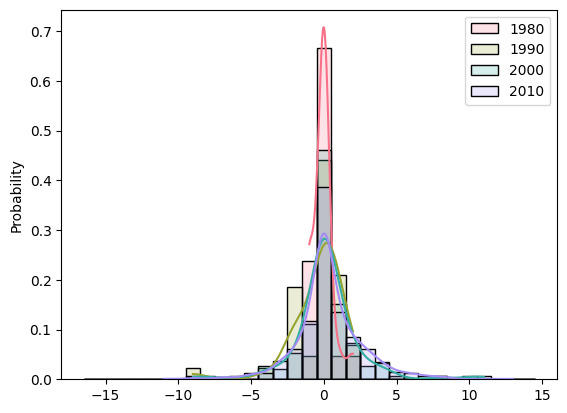

In [115]:
cols = sns.color_palette("husl", 4)
size_max = 21
size_min = 5

for i, y1 in enumerate([1980,1990,2000,2010]):    
    df1 = dict_inc[str(y1)].flatten()
    df1=df1[~np.isnan(df1)]
    sns.histplot(df1, kde = True, bins = np.array(range(size_min - size_max, size_max - size_min))- 0.5, 
                 stat = "probability", label = str(y1), color = cols[i], alpha = 0.2)
plt.legend()

In [35]:
with open(r"C:\Users\PcLaptop\OneDrive\c72h\dict_over.pkl", 'rb') as fp:
    over=pk.load(fp)

KeyboardInterrupt: 

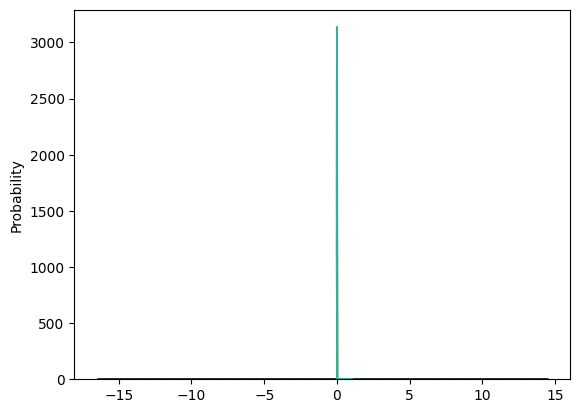

In [38]:
cols = sns.color_palette("husl", 12)
size_max = 21
size_min = 5

for i, y1 in enumerate(range(1990,2014,2)):    
    df1 = over[str(y1)].flatten()
    df1=df1[~np.isnan(df1)]
    sns.histplot(df1, kde = True, bins = np.array(range(size_min - size_max, size_max - size_min))- 0.5, 
                 stat = "probability", label = str(y1), color = cols[i], alpha = 0.5)
plt.legend()